# **Exploratory Data Analysis - Titanic**
The objective of this project is to explore how is the workflow in any predictive modeling problem, how to check & add new features and some Machine Learning Concepts. 


## **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## **Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [ ]:
data = pd.read_csv('titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Exploratory Data Analysis**

### **Missing Values**

In [ ]:
# Checking for null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

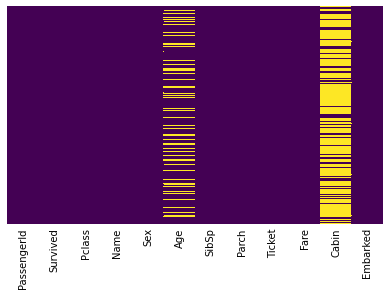

In [ ]:
# Visualizing null values with heatmap 
sns.heatmap(data.isnull(),yticklabels=False,cmap="viridis",cbar=False)

It is clearly visible that **Age**, **Cabin**, and **Embarked** columns have missing values and they need to be fixed.

However, fixing **Cabin** column for null values might not be helpful, as the magnitude of missing values is very large and many passengers have multiple cabins. Hence, it is useless for predicting whether a passenger survived or not.

### **Survival Statistics**

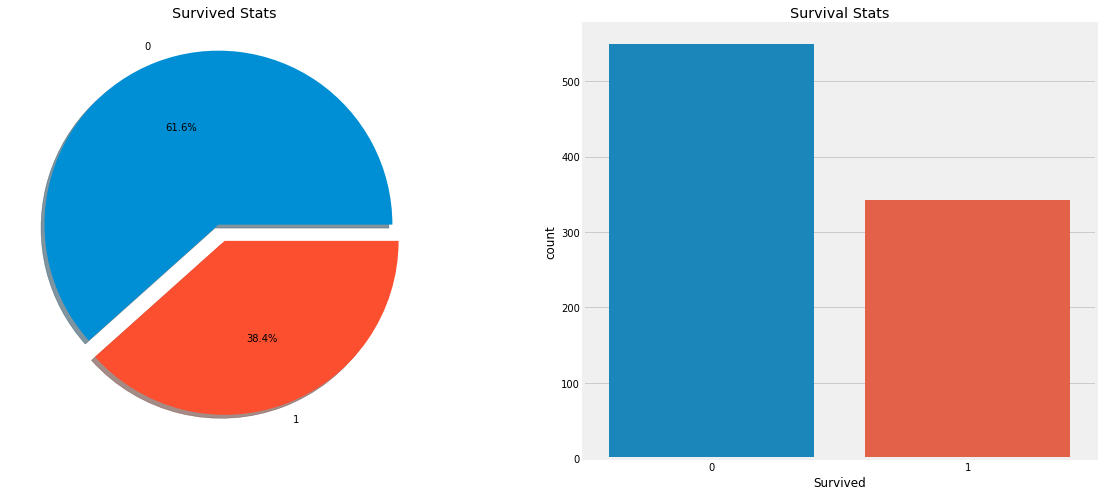

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,8))

# Pie chart to show survival rate
data['Survived'].value_counts().plot.pie(explode=[0.1,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived Stats')
ax[0].set_ylabel('')

# Countplot to show number of survivors and casualties
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survival Stats')
plt.show()

It is evident that not many passengers survived the accident.

Out of 891 passengers in training set, only around 340 survived, i.e., Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't.

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port of Embarkation, Age,etc.

Let us understand the different types of features first.

### **Feature Analysis**

#### **Types of Features**

#### **Categorical Features:** 
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as **Nominal Variables**.

**Categorical Features in the dataset: Sex, Embarked.**

#### **Ordinal Features:**
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For  example, if we have a feature like **Height** with values **Tall, Medium, Short**, then Height is a ordinal variable. Here we can have a relative sort in the variable.

**Ordinal Features in the dataset: PClass**

#### **Continous Feature:**
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

**Continous Features in the dataset: Age**

#### **Categorical Feature --> Sex**



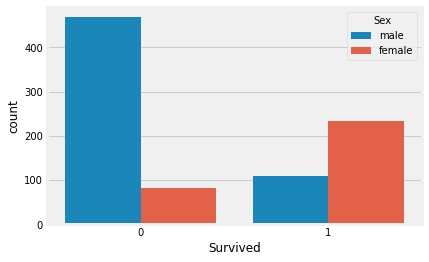

In [ ]:
# Checking the number of passengers who survied based on their sex
sns.countplot(x='Survived',hue='Sex',data=data)
plt.show()

This plot tells us a very interesting fact. Even though the number of men on the ship is lot more than the number of women. Still the number of women saved is almost **twice** the number of males saved. The survival rates for a **women** on the ship is around **75%** while that for **men** in around **18-19%**.

This looks to be a very important feature for modeling.

#### **Ordinal Feature --> Pclass**

In [ ]:
# Calculating a Cross-Tabulation for Pclass and Survived
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


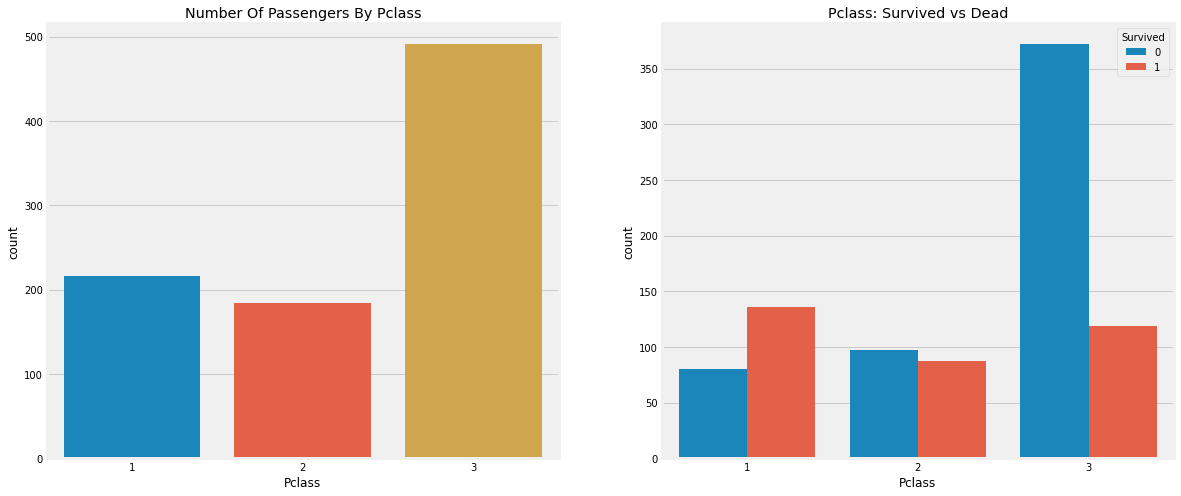

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,8))

# Countplot to show number of passengers by Pclass
sns.countplot('Pclass',data=data,ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')

# Countplot to show number of passengers who survived or not based on Pclass
sns.countplot(x='Pclass',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')

plt.show()

People say **Money Can't Buy Everything**. But we can clearly see that Passenegers of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around **25%**.

For Pclass 1 %survived is around **63%** while for Pclass2 is around **48%**. So money and status matters for our analysis. Such a materialistic world.

Lets dive in little bit more and check for other interesting observations. Lets check survival rate with **Sex** and **Pclass** together.

In [ ]:
# Calculating a Cross-Tabulation for Pclass and Sex with Survived
pd.crosstab([data.Sex,data.Survived],data['Pclass'],margins=True).style.background_gradient(cmap='summer_r')

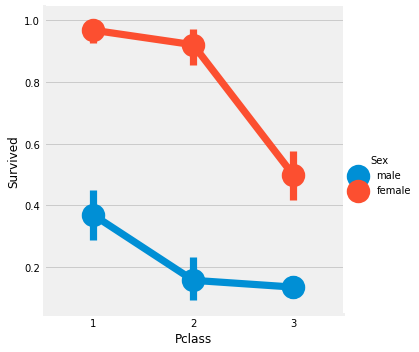

In [ ]:
# Factorplot to visualizing the
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

Using **FactorPlot** in this case is a good option, because they make the seperation of categorical values easy.

Looking at the **CrossTab** and the **FactorPlot**, we can easily infer that survival for **Women from Pclass1** is about **95-96%**, as only 3 out of 94 Women from Pclass1 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

Looks like Pclass is also an important feature. Lets analyse other features.

#### **Continuous Feature --> Age**

In [ ]:
data[['Pclass','Age']].groupby("Pclass").mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


In [ ]:
data[['Sex','Age']].groupby("Sex").mean()

,Age
Sex,
female,27.915709
male,30.726645


In [ ]:
print('Oldest passanger on board:', data.Age.max(),'Years')
print('Youngest passanger on board:', data.Age.min(),'Years')
print('Mean Age of passangers on board:', round(data.Age.mean(),2),'Years')

Oldest passanger on board: 80.0 Years
Youngest passanger on board: 0.42 Years
Mean Age of passangers on board: 29.7 Years


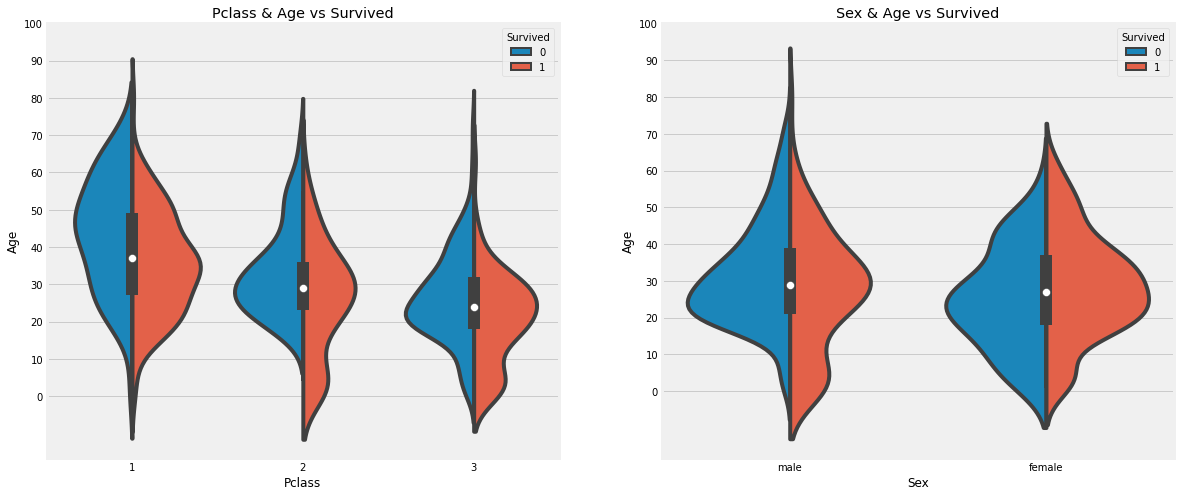

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,8))

#Violin plot
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=data,ax=ax[0],split=True)
ax[0].set_title('Pclass & Age vs Survived')
ax[0].set_yticks(range(0,110,10))

#
sns.violinplot(x='Sex',y='Age',hue='Survived',data=data,ax=ax[1],split=True)
ax[1].set_title('Sex & Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

**Observations:**

1.  The number of children increases with Pclass and the survival rate for passenegers below age 10 (i.e., children) looks to be good irrespective of the Pclass.
2.   Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.
2.   For males, the survival chances decreases with an increase in age.

As we had seen earlier, the Age feature has **177** null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. We need another way to find out what age-band does the passenger lie.

Looking upon the **Name** feature, we can see that the names have a salutation like Mr, Mrs, Master, Miss, or Dr, etc. Thus we can assign the mean values of Mr and Mrs to the respective groups and so on.

In [ ]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') #Extracting the Salutations

Okay so here we are using the Regex: **([A-Za-z]+).**. So what it does is, it looks for strings which lie between A-Z or a-z and followed by a **.(dot)**. So we successfully extract the Initials from the Name.

**Note:** Regex, short for regular expression, is a string of text that allows you to create patterns that help match, locate, and manage text.

In [ ]:
data['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [ ]:
# Checking the Initials with the Sex
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') # .T --> Transpose

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


There are some misspelled Initials like Mlle or Mme that stand for Miss. So, they should be replaced with Miss and same should be done for other initials which can be gathered under a similar initial.

In [ ]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
# Checking the average age by initials
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Filling Missing Age Values:-

In [ ]:
# Assigning the missing age values with the ceil of the mean ages based on initials
def compute_age(cols):
    Age = cols[0]
    Initial = cols[1]
    
    if pd.isnull(Age):
        
        if Initial == 'Master':
            return 5
        elif Initial == 'Miss':
            return 22
        elif Initial == 'Mr':
            return 33
        elif Initial == 'Mrs':
            return 36
        else:
            return 46
    else:
        return Age

In [ ]:
data['Age'] = data[['Age','Initial']].apply(compute_age,axis=1)

In [ ]:
# Checking whether any null values are remaining 
data.Age.isnull().any() 

False

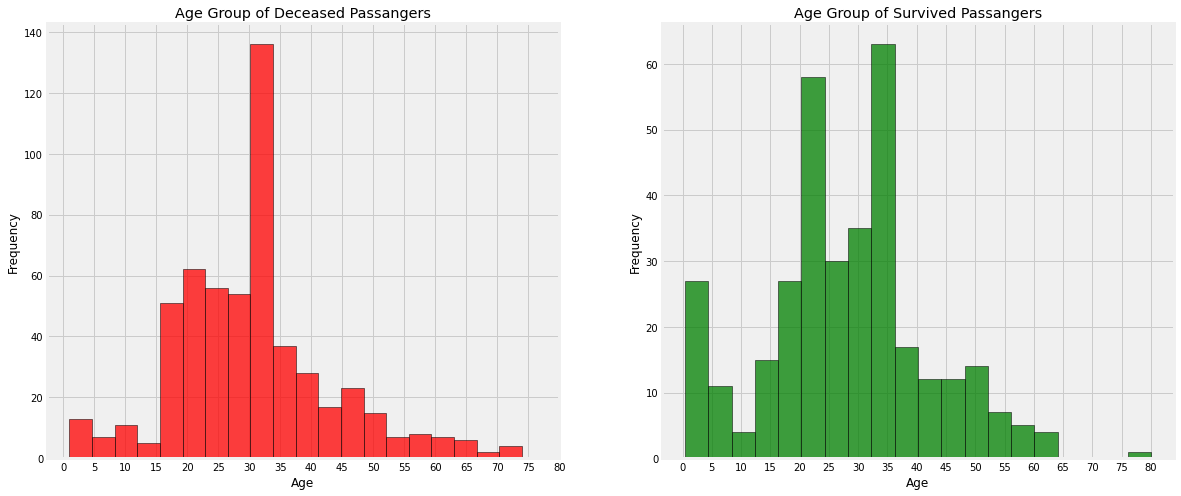

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,8))

sns.histplot(data=data,x=data[data['Survived']==0].Age,color='red',bins=20,edgecolor='black',ax=ax[0])
ax[0].set_title("Age Group of Deceased Passangers")
ax[0].set_xticks(list(range(0,85,5)))
ax[0].set_ylabel("Frequency")

sns.histplot(data=data,x=data[data['Survived']==1].Age,color='green',bins=20,edgecolor='black',ax=ax[1])
ax[1].set_title("Age Group of Survived Passangers")
ax[1].set_xticks(list(range(0,85,5)))
ax[1].set_ylabel("Frequency")

plt.show()

**Observations:**

1.   The Toddlers (age<5) were saved in large numbers (the Women and children were given the first priority while rescue).
2.   The oldest passenger (80 years) was also saved.
3.   Maximum number of casualities occured in the age group of 30-40.


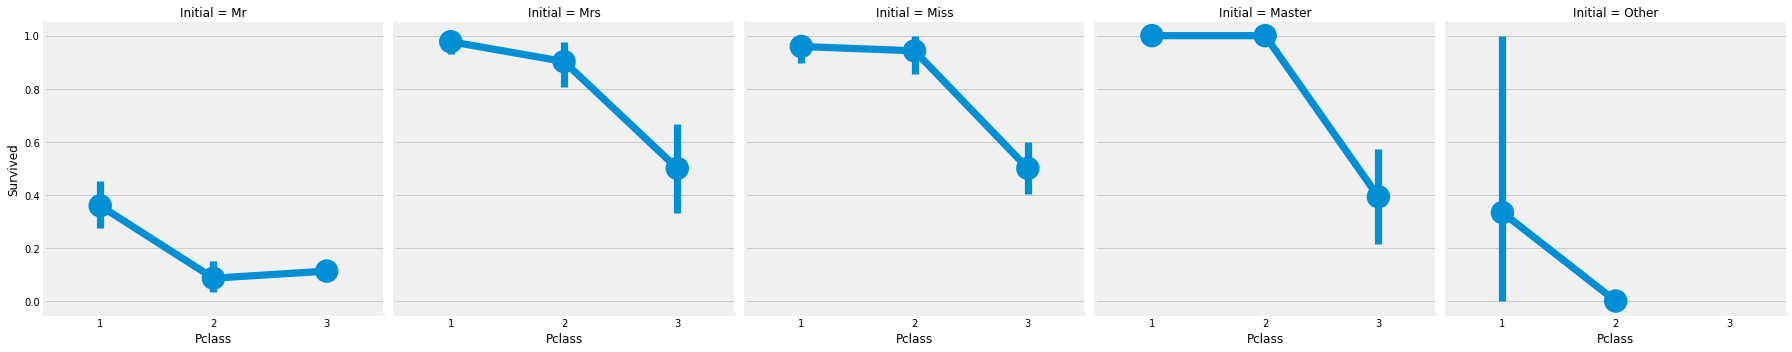

In [ ]:
# Checking if Passengers who survived based on their class and initials
sns.factorplot('Pclass','Survived',col='Initial',data=data)
plt.show()

Hence, it is clear that irrespective of the class, Women and Children were given the top priority during the rescue.

#### **Categorical Feature --> Embarked**

In [ ]:
pd.crosstab([data.Embarked,data.Pclass],[data.Sex,data.Survived],margins=True).style.background_gradient(cmap='summer_r')

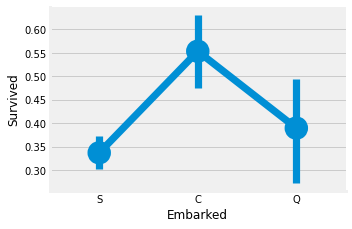

In [ ]:
# Chances for survival by port of embarkation
sns.factorplot('Embarked','Survived',data=data)
fig=plt.gcf() # Get current figure
fig.set_size_inches(5,3)
plt.show()

From the above factorplot, we can infer that the chances for survival for Port C is highest, around 0.55, while it is lowest for S. 

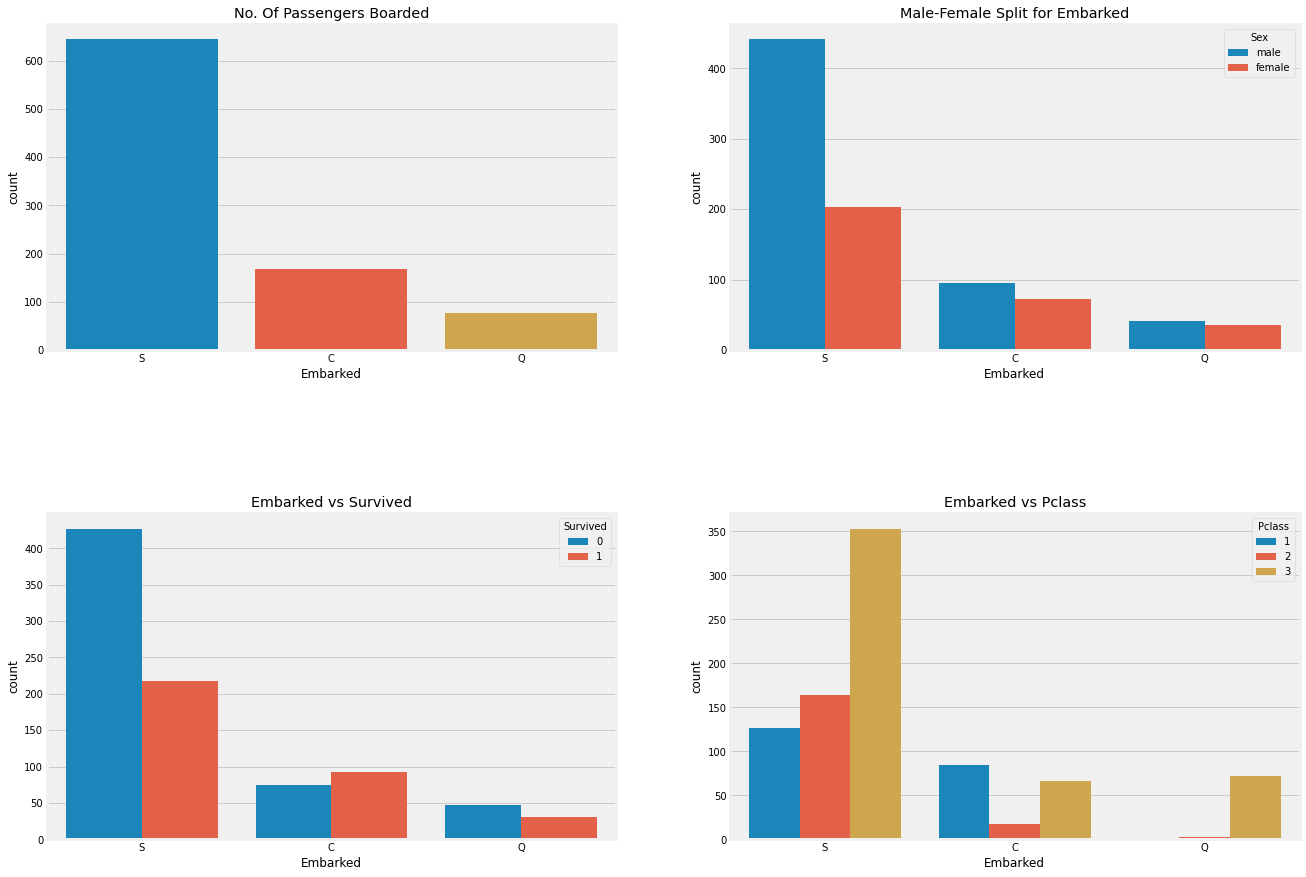

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

**Observations:**

1.   Maximum passenegers boarded from S. Majority of them being from Pclass 3.
2.   The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass 1 and 2 Passengers.
3.   The Embark S looks like the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass 3 (around 81%) didn't survive.
4.   Port Q had almost 95% of the passengers were from Pclass 3.



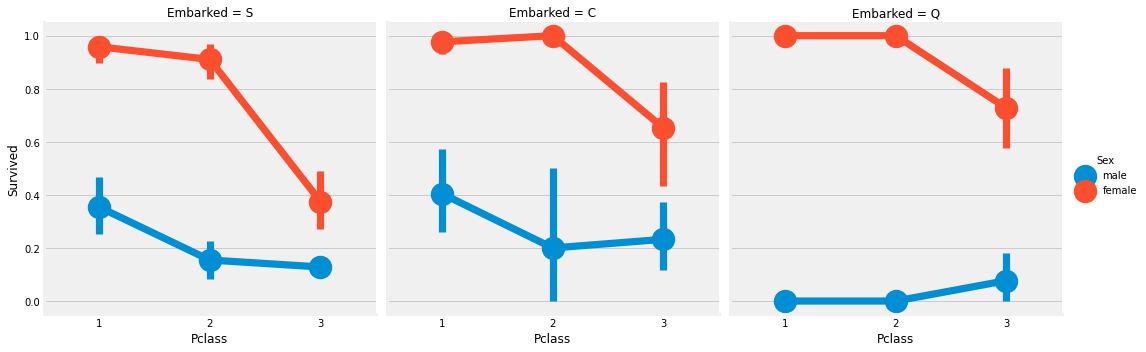

In [ ]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=data)
plt.show()

**Observations:**

1.   The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.
2.   Port S looks to be very unlucky for Pclass3 Passenegers as the survival rate for both men and women is very low.(Money Matters)
3.   Port Q looks looks to be unlukiest for Men, as almost all were from Pclass 3.

Filling Missing Embarked Values:-

As most of the passengers boarded from the port S, so it is safe to assign S as the embarked port for the passangers whose embarkation details are missing.

In [ ]:
data['Embarked'].fillna('S',inplace=True)

In [ ]:
# Checking whether any null values are remaining 
data.Embarked.isnull().any() 

False

#### **Discrete Feature --> SibSp**


This feature represents whether a person is alone or with his family members.
* Sibling --> brother, sister, stepbrother, stepsister
* Spouse --> husband, wife

In [ ]:
pd.crosstab([data.SibSp],data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


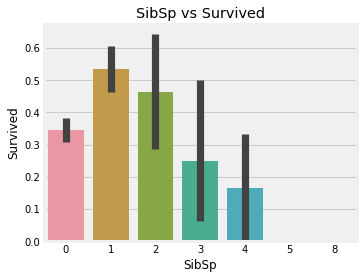

In [ ]:
plt.figure(figsize=(5,4))
sns.barplot('SibSp','Survived',data=data).set(title='SibSp vs Survived')
plt.show()

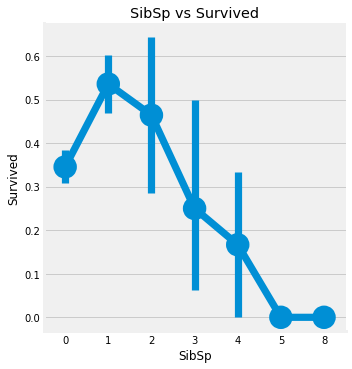

In [ ]:
sns.factorplot('SibSp','Survived',data=data).set(title='SibSp vs Survived')
plt.show()

In [ ]:
pd.crosstab(data.SibSp,data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
SibSp,,,,
0,137,120,351,608
1,71,55,83,209
2,5,8,15,28
3,3,1,12,16
4,0,0,18,18
5,0,0,5,5
8,0,0,7,7
All,216,184,491,891


**Observations:**

1.   The barplot and factorplot shows that if passenger is alone onboard with no siblings, he/she have **34.5% survival rate**. 
2.   The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first.
3.   Surprisingly the survival for families with 5-8 members is **0%**. The reason is **Pclass**. The crosstab clearly shows that passwngers with **SibSp > 3** were all in **Pclass 3**. It is imminent that all the large families in Pclass 3 died.

#### **Discrete Feature --> Parch**


Just like Sibsp feature, this feature represents whether a person is alone or with his family members, i.e., parents or children.

In [ ]:
pd.crosstab(data.Parch,data.Pclass,margins=True).style.background_gradient(cmap='summer_r')

Pclass,1,2,3,All
Parch,,,,
0,163,134,381,678
1,31,32,55,118
2,21,16,43,80
3,0,2,3,5
4,1,0,3,4
5,0,0,5,5
6,0,0,1,1
All,216,184,491,891


The crosstab again highlights the same fact that larger families (Parch > 3) were in Pclass 3.

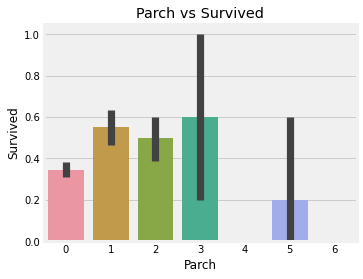

In [ ]:
plt.figure(figsize=(5,4))
sns.barplot('Parch','Survived',data=data).set(title='Parch vs Survived')
plt.show()

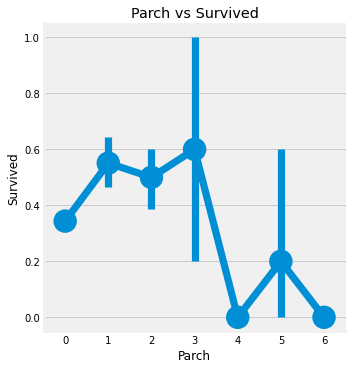

In [ ]:
sns.factorplot('Parch','Survived',data=data).set(title='Parch vs Survived')
plt.show()

In [ ]:
pd.crosstab(data.Parch,data.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


**Observations:**

Here too the results are quite similar. Passengers with their parents or children (Parch < 3) onboard have greater chance of survival. However, the chances of survival reduce as the number goes up.

The chances of survival is good for somebody who has 1-3 members including parents or children on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has > 4 members including parents or children on the ship.


#### **Continuous Feature --> Fare**

In [ ]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


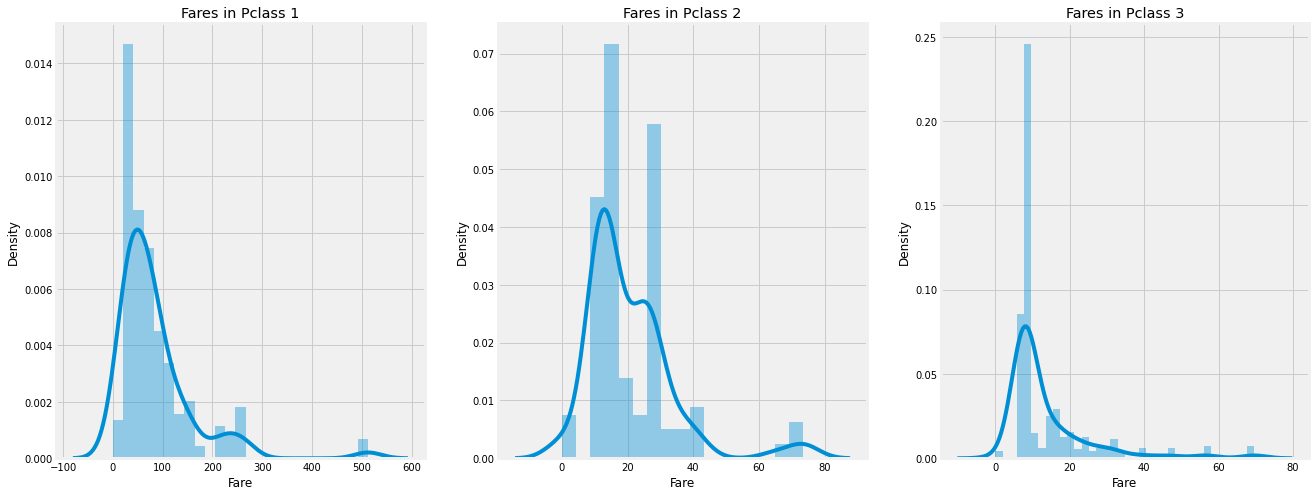

In [ ]:
f,ax = plt.subplots(1,3,figsize=(20,8))

sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.

#### **Observations in a Nutshell for all features:**
**Sex:** The chances of survival for women is high as compared to men.

**Pclass:** There is a visible trend that being a **1st class passenger** gives you better chances of survival. The survival rate for **Pclass3 is very low**. For **women**, the chance of survival from **Pclass1** is almost 1 and is high too for those from **Pclass2**.   **Money Wins!!!**. 

**Age:** Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

**Embarked:** This is a very interesting feature. **The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S.** Passengers at Q were all from **Pclass3**. 

**Parch+SibSp:** Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.

### **Correlation between Features**

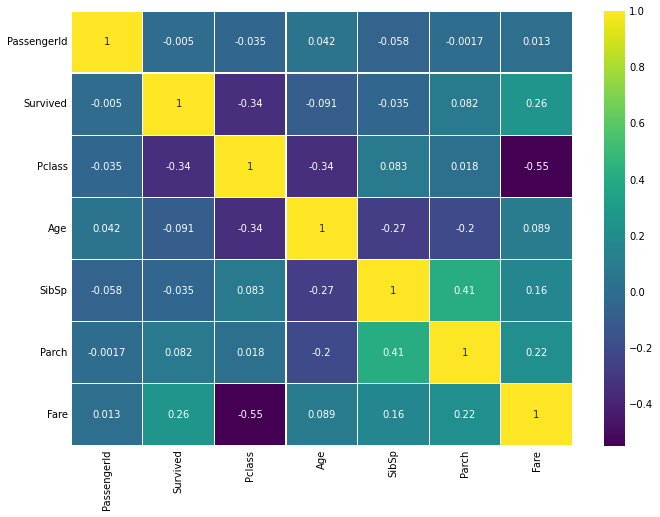

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='viridis',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

**Interpreting the Heatmap:**

The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly **correlation** is-

* **Positive Correlation:** If an **increase in feature A leads to increase in feature B, then they are positively correlated**. A value **1 means perfect positive correlation**.

* **Negative Correlation:** If an **increase in feature A leads to decrease in feature B, then they are negatively correlated**. A value **-1 means perfect negative correlation**.

Now, lets say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as **MultiColinearity** as both of them contains almost the same information.

So do you think we should use both of them as **one of them is redundant**. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now, from the above heatmap, we can see that the features are not much correlated. The highest correlation is between **SibSp and Parch i.e 0.41**. So we can carry on with all features.

## **Feature Engineering & Data Cleaning**

Whenever we are given a dataset with features, it is not necessary that all the features will be important. There maybe be many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.

An example would be getting the Initals feature using the Name Feature. Lets see if we can get any new features and eliminate a few. Also we will tranform the existing relevant features to suitable form for Predictive Modeling.